In [1]:
#import tensorflow as tf
#import tensorflow 

#from tensorflow 
import keras
import random

from keras.preprocessing import image
from glob import glob

import cv2, os
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
path='train'
#open(path).readline()
ROW, COL = 96, 96

In [3]:
dogs, cats = [], []
y_dogs , y_cats = [], []

In [4]:

dog_path = os.path.join(path, 'dogs', 'dog*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW,COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

#Se cargan lasimagenes de perros
cat_path=os.path.join(path,'cats','cat*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat,cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW,COL))
    cat = image.img_to_array(cat)
    cats.append(cat)
    
print('Se han cargado todas las imagenes')
    

Se han cargado todas las imagenes


In [5]:
print('Longitud del array  de perros : {}\nlongitud del array de gatos: {}'.format(len(dogs),len(cats)))

Longitud del array  de perros : 11500
longitud del array de gatos: 11500


In [6]:
classes = ['dog','cat']

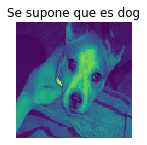

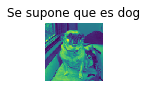

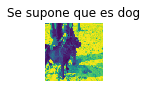

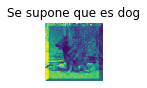

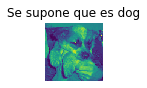

In [7]:
plt.figure(figsize=(12,8))

for i in range (5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Se supone que es {}'.format(classes[0]))
    
    plt.show()

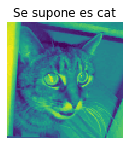

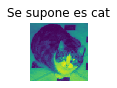

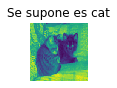

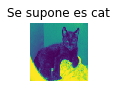

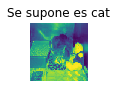

In [8]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1 ,5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Se supone es {}'.format(classes[1]))
    
    plt.show()

In [9]:
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [10]:
dogs = np.asarray(dogs).astype('float32')
cats = np.asarray(cats).astype('float32')
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')
dogs /= 255
cats /= 255

In [11]:
x = np.concatenate((dogs,cats),axis=0)
y = np.concatenate((y_dogs, y_cats), axis=0)

In [12]:

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint 
from keras.models import save_model, load_model

In [13]:
IMG_CHANNEL = 1
BATCH_SIZE = 128
N_EPOCH = 15
VERBOSE = 2
VALIDAION_SPLIT = .2
OPTIM = Adam()
N_CLASSES = len(classes)

In [14]:
y = np_utils.to_categorical(y, N_CLASSES)

print('One-Hot Encoding listo')

One-Hot Encoding listo


In [15]:


model = Sequential([
    Conv2D(32,(3,3), padding='same', input_shape=(ROW,COL, IMG_CHANNEL), activation='relu'),
    Conv2D(32,(3,3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               37749248  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [16]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,metrics=['accuracy'])

checkpoint = ModelCheckpoint('model_checkpoint/dogs_vs_cats_redux_checkpoint.h5')

In [17]:



model.fit(x , y, batch_size=BATCH_SIZE,epochs=N_EPOCH,validation_split=VALIDAION_SPLIT, verbose=VERBOSE)

Epoch 1/15
144/144 - 398s - loss: 0.7918 - accuracy: 0.6188 - val_loss: 1.1939 - val_accuracy: 0.0628
Epoch 2/15
144/144 - 396s - loss: 0.5869 - accuracy: 0.6827 - val_loss: 1.1893 - val_accuracy: 0.1846
Epoch 3/15
144/144 - 406s - loss: 0.5212 - accuracy: 0.7368 - val_loss: 0.4441 - val_accuracy: 0.8543
Epoch 4/15
144/144 - 383s - loss: 0.4592 - accuracy: 0.7841 - val_loss: 0.6856 - val_accuracy: 0.6402
Epoch 5/15
144/144 - 361s - loss: 0.4024 - accuracy: 0.8170 - val_loss: 0.6858 - val_accuracy: 0.6641
Epoch 6/15
144/144 - 377s - loss: 0.3498 - accuracy: 0.8463 - val_loss: 0.6649 - val_accuracy: 0.7043
Epoch 7/15
144/144 - 397s - loss: 0.2908 - accuracy: 0.8769 - val_loss: 0.7022 - val_accuracy: 0.6939
Epoch 8/15
144/144 - 388s - loss: 0.2394 - accuracy: 0.9008 - val_loss: 0.7651 - val_accuracy: 0.6909
Epoch 9/15
144/144 - 388s - loss: 0.1958 - accuracy: 0.9216 - val_loss: 0.7637 - val_accuracy: 0.7196
Epoch 10/15
144/144 - 373s - loss: 0.1637 - accuracy: 0.9349 - val_loss: 0.9583 - 